# ***📦IMPORT LIBRARY***

---



Bagian ini mencakup impor pustaka penting yang diperlukan untuk prapemrosesan data, pemodelan, dan evaluasi dalam proyek. Setiap pustaka yang diimpor memainkan peran penting dalam menangani berbagai tugas seperti manipulasi data, pemrosesan teks, pembuatan model, dan evaluasi.

In [1]:
!pip install google-play-scraper pandas
from google_play_scraper import reviews_all, Sort
from datetime import datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.3 MB/s eta 0:00:00


In [2]:
import os
import re
import csv
import requests
from io import StringIO
import nltk
import json
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from io import StringIO
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC  # SVM classifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from io import StringIO
from sklearn.model_selection import GridSearchCV

## ***📥NLTK Installation***

In [3]:
nltk.download('stopwords')
nltk.download('punkt')  # Pastikan sudah ada
nltk.download('omw-1.4')  # Jika menggunakan WordNet (opsional)
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**1. nltk.download('stopwords')**


*   Fungsi: Mengunduh daftar stopwords (kata umum yang biasanya dibuang saat analisis teks, seperti “the”, “is”, “in” dalam bahasa Inggris).
*   Gunanya: Membantu dalam preprocessing teks, misalnya saat ingin mengekstrak kata-kata penting dan mengabaikan kata-kata umum.

**2. nltk.download('punkt')**

*   Fungsi: Mengunduh tokenizer punkt, digunakan untuk memecah teks menjadi kalimat atau kata.
*   Gunanya: Digunakan dalam fungsi seperti nltk.sent_tokenize() dan nltk.word_tokenize().

**3. nltk.download('omw-1.4')**

*   Fungsi: "Open Multilingual Wordnet", yaitu data tambahan untuk WordNet dalam berbagai bahasa.
*   Gunanya: Jika kamu menggunakan WordNet (misalnya untuk sinonim atau analisis semantik), data ini akan meningkatkan hasilnya.

**4. nltk.download('wordnet')**

*   Fungsi: Mengunduh WordNet, sebuah kamus bahasa Inggris besar yang mengelompokkan kata-kata berdasarkan arti (synset).
*   Gunanya: Untuk mencari sinonim, antonim, definisi, dan relasi semantik antar kata. Cocok untuk NLP lanjutan seperti lemmatization atau pemahaman konteks kata.
















# **PENGUMPULAN DATA**

In [4]:
# ID aplikasi yang akan di-scrap
app_id = "com.deepseek.chat"

# Ambil semua ulasan yang tersedia
app_reviews = reviews_all(
    app_id,
    lang="engs",  # Bahasa inggris
    sort=Sort.MOST_RELEVANT,
    count=50000
)
# Konversi ke DataFrame
df = pd.DataFrame(app_reviews)
# Ubah kolom 'at' ke format datetime
df['at'] = pd.to_datetime(df['at'])
# Filter berdasarkan rentang tanggal
start_date = datetime(2025, 1, 8)
end_date = datetime(2025, 5, 8)
df_filtered = df[(df['at'] >= start_date) & (df['at'] <= end_date)]

# Simpan seluruh data ke file CSV
df_filtered.to_csv('hasil_pengumpulan_ulasan_deepseek_eng_8_mei.csv', index=False, encoding='utf-8')
print("Scraping selesai")
print(f"Jumlah ulasan yang dikumpulkan: {len(df_filtered)}")

Scraping selesai
Jumlah ulasan yang dikumpulkan: 29779


# ***📁 IMPORT DAN LOAD DATA***

---

💾 Siapkan file data seperti slangwords.txt, positive.tsv, negative.tsv



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/MyDrive/ANALISIS SENTIMEN/DATASET/hasil_pengumpulan_ulasan_deepseek_eng_8_mei.csv'
df = pd.read_csv(file_path)

# ***Eksplorasi Data***

In [7]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1592609e-53b7-479d-aaa7-026aa6c916e1,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Deepseek is a serious and powerful contender f...,4,222,1.0.8,2025-01-28 22:36:54,NaN,NaN,1.0.8
1,ea06670a-83ed-4a71-8de1-ebd0edd82ae3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I've had a wonderful experience. The AI has be...,4,300,1.1.1,2025-03-07 20:44:48,NaN,NaN,1.1.1
2,f6efaf5e-fe3a-4c71-ae8b-77e4f82bc456,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,server is busy please try again later that's p...,2,32,1.1.5,2025-04-07 12:45:14,NaN,NaN,1.1.5
3,cce78f17-8500-45b4-a0a1-5ec39511db09,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,First impressions are good. I note the comment...,4,21,1.1.8,2025-04-29 17:17:01,NaN,NaN,1.1.8
4,022e65ad-81df-4b9c-84c8-92fe0d428801,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"DeepSeek might be slower than ChatGPT, but the...",3,173,1.1.7,2025-04-21 13:38:40,NaN,NaN,1.1.7


In [8]:
df = df.drop(columns=[col for col in df.columns if col not in ['score', 'content']])

# Cek hasilnya
df.head()

,content,score
0,Deepseek is a serious and powerful contender f...,4
1,I've had a wonderful experience. The AI has be...,4
2,server is busy please try again later that's p...,2
3,First impressions are good. I note the comment...,4
4,"DeepSeek might be slower than ChatGPT, but the...",3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31405 entries, 0 to 31404
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  31403 non-null  object
 1   score    31405 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 490.8+ KB


In [10]:
# Cek jumlah nilai yang hilang per kolom
print("Cek nilai yang hilang:")
print(df.isnull().sum())
# Cek jumlah baris yang duplikat (seluruh baris sama persis)
print("\nJumlah baris duplikat:", df.duplicated().sum())

Cek nilai yang hilang:
content    2
score      0
dtype: int64

Jumlah baris duplikat: 6022


In [11]:
# Remove rows containing null values
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25381 entries, 0 to 31401
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  25381 non-null  object
 1   score    25381 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 594.9+ KB


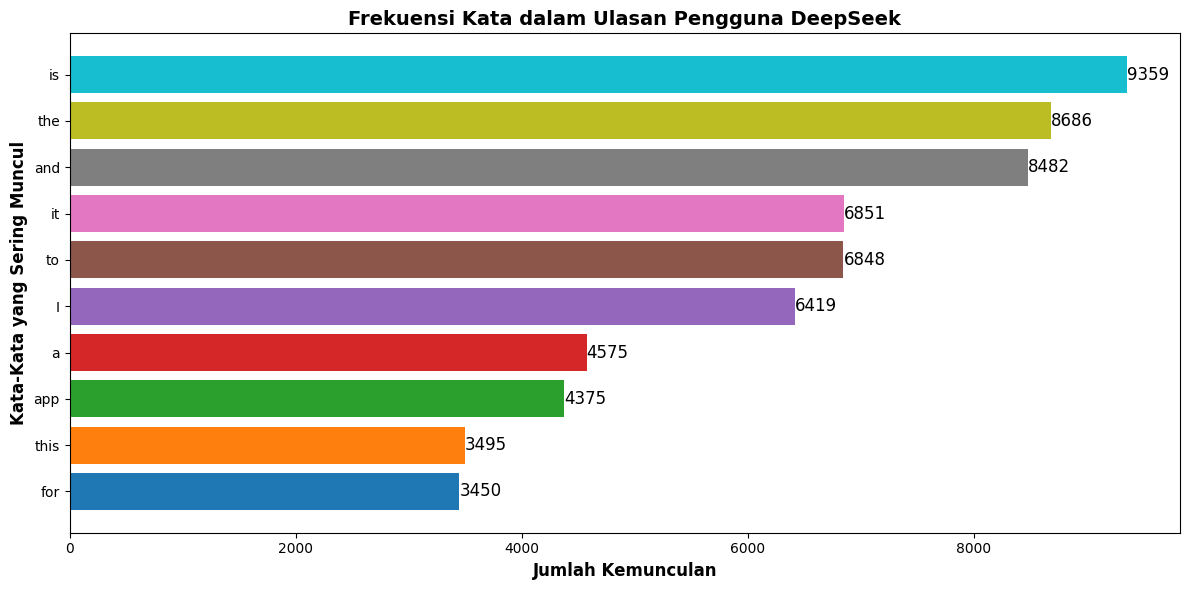

In [13]:
# Gabungkan semua teks ulasan menjadi satu string
text = " ".join(df["content"].dropna())

# Tokenisasi (memisahkan kata-kata)
tokens = text.split()

# Hitung kemunculan setiap kata
word_counts = Counter(tokens)

# Ambil 10 kata yang paling sering muncul
top_words = word_counts.most_common(10)

# Pisahkan kata dan jumlah kemunculannya, lalu balik urutan
words, counts = zip(*top_words)
words = words[::-1]   # Balik urutan kata
counts = counts[::-1] # Balik urutan jumlah

# Definisikan palet warna
colors = plt.cm.tab10(range(len(words)))

# Membuat plot batang horizontal
plt.figure(figsize=(12, 6))
bars = plt.barh(words, counts, color=colors)

# Label sumbu
plt.ylabel("Kata-Kata yang Sering Muncul", fontsize=12, fontweight="bold")
plt.xlabel("Jumlah Kemunculan", fontsize=12, fontweight="bold")
plt.title("Frekuensi Kata dalam Ulasan Pengguna DeepSeek", fontsize=14, fontweight="bold")

# Tambahkan angka di samping bar
for bar, num in zip(bars, counts):
    plt.text(num + 1, bar.get_y() + bar.get_height() / 2,
             str(num), va='center', fontsize=12)

# Tampilkan plot
plt.tight_layout()
plt.show()

# ***Text Pre-Processing Functions***

## CLEAN TEXT

In [14]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # Hapus karakter selain huruf dan spasi
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)  # Huruf berulang >2 jadi 2 huruf
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
    return text

## LOWERCASE TEXT / CASE FOLDING

In [15]:
def lowercase_text(text):
    return text.lower()


## REPLACE SLANG WORDS / NORMALISASI

In [16]:
slang_file_path = '/content/drive/MyDrive/ANALISIS SENTIMEN/DATASET/slang.txt'
# Load slangwords dari file JSON lokal
with open(slang_file_path, 'r', encoding='utf-8') as f:
    slangwords = json.load(f)

# Fungsi mengganti slang words dalam teks
def replace_slang_words(text):
    words = text.split()
    return ' '.join([slangwords.get(word.lower(), word) for word in words])

## TOKENIZE TEXT

In [17]:
# def tokenize_text(text):
#     # Replace frasa custom sebelum tokenisasi

#     tokens = word_tokenize(text)
#     return tokens

In [18]:
def tokenize_text(text):
    # Replace custom phrases
    custom_phrases = {
        "not good": "not_good",
        "not bad": "not_bad",
        "no problem": "no_problem",
        "don't like": "dont_like",
        "not working": "not_working"
    }
    for phrase, replacement in custom_phrases.items():
        text = text.replace(phrase, replacement)
    tokens = word_tokenize(text)
    return tokens

## REMOVE STOP WORDS

In [19]:
# def remove_stopwords(tokens):
#     # Retrieve English stopwords
#     stopword_list = set(stopwords.words('english'))

#     # Filter stopwords from the token list
#     filtered_tokens = [word for word in tokens if word.lower() not in stopword_list]

#     return filtered_tokens

In [20]:
def remove_stopwords(tokens):
    # Ambil daftar stopwords dari NLTK
    stopword_list = set(stopwords.words('english'))

    # Daftar kata negasi yang ingin dipertahankan
    negation_words = {'not', 'cannot','no', 'nt'}

    # Filter token: hapus stopwords KECUALI jika itu adalah kata negasi
    filtered_tokens = [
        word for word in tokens
        if word.lower() not in stopword_list or word.lower() in negation_words
    ]
    return filtered_tokens


## STEMMING

In [21]:
from nltk.stem import SnowballStemmer
def stem_text(tokens):
    stemmer = SnowballStemmer("english")
    return [stemmer.stem(token) for token in tokens]

## MERGE TO SENTENSE

In [22]:
def join_tokens(tokens):
    # Combine the list of tokens into one string, with spaces as the separator
    return ' '.join(tokens)

# ***Text Pre-Processing Implementation***

In [23]:
# Bersihkan teks dan simpan di kolom 'clean_text'
df['clean_text'] = df['content'].apply(clean_text)

# Ubah teks menjadi huruf kecil dan simpan di kolom 'lowercase_text'
df['lowercase_text'] = df['clean_text'].apply(lowercase_text)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpan hasilnya di kolom 'slang_replaced_text'
df['slang_replaced_text'] = df['lowercase_text'].apply(replace_slang_words)

# Tokenisasi teks dan simpan token di kolom 'tokenized_text'
df['tokenized_text'] = df['slang_replaced_text'].apply(tokenize_text)

# Hapus stopwords dan simpan token yang sudah dibersihkan di kolom 'no_stopwords_text'
df['no_stopwords_text'] = df['tokenized_text'].apply(remove_stopwords)

# Terapkan lemmatization pada token dan simpan hasilnya di kolom 'lemmatized_text'
df['stemmed_text'] = df['no_stopwords_text'].apply(stem_text)

# Gabungkan token-token tersebut menjadi sebuah kalimat dan simpan hasilnya di kolom 'final_clean_text'
df['final_clean_text'] = df['stemmed_text'].apply(join_tokens)

In [24]:
df.head(10)

,content,score,clean_text,lowercase_text,slang_replaced_text,tokenized_text,no_stopwords_text,stemmed_text,final_clean_text
0,Deepseek is a serious and powerful contender f...,4,Deepseek is a serious and powerful contender f...,deepseek is a serious and powerful contender f...,deepseek is a serious and powerful contender f...,"[deepseek, is, a, serious, and, powerful, cont...","[deepseek, serious, powerful, contender, popul...","[deepseek, serious, power, contend, popular, a...",deepseek serious power contend popular ai mode...
1,I've had a wonderful experience. The AI has be...,4,I ve had a wonderful experience The AI has bee...,i ve had a wonderful experience the ai has bee...,i ve had a wonderful experience the ai has bee...,"[i, ve, had, a, wonderful, experience, the, ai...","[wonderful, experience, ai, helpful, run, issu...","[wonder, experi, ai, help, run, issu, thing, b...",wonder experi ai help run issu thing bother se...
2,server is busy please try again later that's p...,2,server is busy please try again later that s p...,server is busy please try again later that s p...,server is busy please try again later that s p...,"[server, is, busy, please, try, again, later, ...","[server, busy, please, try, later, pretty, muc...","[server, busi, pleas, tri, later, pretti, much...",server busi pleas tri later pretti much unfort...
3,First impressions are good. I note the comment...,4,First impressions are good I note the comments...,first impressions are good i note the comments...,first impressions are good i note the comments...,"[first, impressions, are, good, i, note, the, ...","[first, impressions, good, note, comments, lat...","[first, impress, good, note, comment, latenc, ...",first impress good note comment latenc slow se...
4,"DeepSeek might be slower than ChatGPT, but the...",3,DeepSeek might be slower than ChatGPT but the ...,deepseek might be slower than chatgpt but the ...,deepseek might be slower than chatgpt but the ...,"[deepseek, might, be, slower, than, chatgpt, b...","[deepseek, might, slower, chatgpt, depth, deta...","[deepseek, might, slower, chatgpt, depth, deta...",deepseek might slower chatgpt depth detail ans...
5,While the app is very good and I'm impressed a...,3,While the app is very good and I m impressed a...,while the app is very good and i m impressed a...,while the app is very good and i m impressed a...,"[while, the, app, is, very, good, and, i, m, i...","[app, good, impressed, glad, free, reason, inc...","[app, good, impress, glad, free, reason, incre...",app good impress glad free reason incred diffi...
6,Incredibly impressive for something relatively...,5,Incredibly impressive for something relatively...,incredibly impressive for something relatively...,incredibly impressive for something relatively...,"[incredibly, impressive, for, something, relat...","[incredibly, impressive, something, relatively...","[incred, impress, someth, relat, new, perform,...",incred impress someth relat new perform better...
7,"This is actually quite great. The ""Deep Think""...",5,This is actually quite great The Deep Think fe...,this is actually quite great the deep think fe...,this is actually quite great the deep think fe...,"[this, is, actually, quite, great, the, deep, ...","[actually, quite, great, deep, think, feature,...","[actual, quit, great, deep, think, featur, fas...",actual quit great deep think featur fascin see...
8,This is the first reasoning model that is capa...,5,This is the first reasoning model that is capa...,this is the first reasoning model that is capa...,this is the first reasoning model that is capa...,"[this, is, the, first, reasoning, model, that,...","[first, reasoning, model, capable, searching, ...","[first, reason, model, capabl, search, web, la...",first reason model capabl search web latest in...
9,"Works great when it's not overloaded. However,...",3,Works great when it s not overloaded However i...,works great when it s not overloaded however i...,works great when it s no

## List to String

In [25]:
def list_to_string(lst):

    # Menggabungkan elemen daftar menjadi satu string, dipisahkan dengan koma dan diapit oleh tanda kurung
    return '[' + ', '.join(lst) + ']'

In [26]:
df['tokenized_text'] = df['tokenized_text'].apply(list_to_string)
df['no_stopwords_text'] = df['no_stopwords_text'].apply(list_to_string)
df['stemmed_text'] = df['stemmed_text'].apply(list_to_string)

In [27]:
df.head()

,content,score,clean_text,lowercase_text,slang_replaced_text,tokenized_text,no_stopwords_text,stemmed_text,final_clean_text
0,Deepseek is a serious and powerful contender f...,4,Deepseek is a serious and powerful contender f...,deepseek is a serious and powerful contender f...,deepseek is a serious and powerful contender f...,"[deepseek, is, a, serious, and, powerful, cont...","[deepseek, serious, powerful, contender, popul...","[deepseek, serious, power, contend, popular, a...",deepseek serious power contend popular ai mode...
1,I've had a wonderful experience. The AI has be...,4,I ve had a wonderful experience The AI has bee...,i ve had a wonderful experience the ai has bee...,i ve had a wonderful experience the ai has bee...,"[i, ve, had, a, wonderful, experience, the, ai...","[wonderful, experience, ai, helpful, run, issu...","[wonder, experi, ai, help, run, issu, thing, b...",wonder experi ai help run issu thing bother se...
2,server is busy please try again later that's p...,2,server is busy please try again later that s p...,server is busy please try again later that s p...,server is busy please try again later that s p...,"[server, is, busy, please, try, again, later, ...","[server, busy, please, try, later, pretty, muc...","[server, busi, pleas, tri, later, pretti, much...",server busi pleas tri later pretti much unfort...
3,First impressions are good. I note the comment...,4,First impressions are good I note the comments...,first impressions are good i note the comments...,first impressions are good i note the comments...,"[first, impressions, are, good, i, note, the, ...","[first, impressions, good, note, comments, lat...","[first, impress, good, note, comment, latenc, ...",first impress good note comment latenc slow se...
4,"DeepSeek might be slower than ChatGPT, but the...",3,DeepSeek might be slower than ChatGPT but the ...,deepseek might be slower than chatgpt but the ...,deepseek might be slower than chatgpt but the ...,"[deepseek, might, be, slower, than, chatgpt, b...","[deepseek, might, slower, chatgpt, depth, deta...","[deepseek, might, slower, chatgpt, depth, deta...",deepseek might slower chatgpt depth detail ans...


In [28]:
# Drop rows that contain any null values in any column
df = df.dropna()

# ***Export to CSV***

In [29]:
df.to_csv("hasil_preprocessing_data.csv", index=False, encoding="utf-8")

In [30]:
# Drop rows that contain any null values in any column
df = df.dropna()

# ***Loading the Processed DataFrame***

In [31]:
df = pd.read_csv('hasil_preprocessing_data.csv')

## Convert String to List

In [32]:
def string_to_list(string):
    # Remove the square brackets and split the string by commas
    items = string.strip('[]').split(', ')

    # Return the list of items without changing their format
    return items

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25381 entries, 0 to 25380
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   content              25381 non-null  object
 1   score                25381 non-null  int64 
 2   clean_text           24542 non-null  object
 3   lowercase_text       24542 non-null  object
 4   slang_replaced_text  24542 non-null  object
 5   tokenized_text       25381 non-null  object
 6   no_stopwords_text    25381 non-null  object
 7   stemmed_text         25381 non-null  object
 8   final_clean_text     24530 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.7+ MB


In [34]:
# Drop rows that contain any null values in any column
df = df.dropna()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24530 entries, 0 to 25372
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   content              24530 non-null  object
 1   score                24530 non-null  int64 
 2   clean_text           24530 non-null  object
 3   lowercase_text       24530 non-null  object
 4   slang_replaced_text  24530 non-null  object
 5   tokenized_text       24530 non-null  object
 6   no_stopwords_text    24530 non-null  object
 7   stemmed_text         24530 non-null  object
 8   final_clean_text     24530 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.9+ MB


In [36]:
# Apply the parsing function to the necessary columns
df['tokenized_text'] = df['tokenized_text'].apply(string_to_list)
df['no_stopwords_text'] = df['no_stopwords_text'].apply(string_to_list)
df['stemmed_text'] = df['stemmed_text'].apply(string_to_list)

# ***PELABELAN DATA METODE LEXICON BASED***




## Mengambil Leksikon

In [37]:
# Ensure vadersentiment is installed
!pip install vadersentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [38]:
# Import the SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

In [39]:
# Fungsi analisis sentimen
def analyze_sentiment_english(text):
    if not isinstance(text, str):
        return 0.05, 'netral'  # Jika bukan string, dianggap netral

    score = analyzer.polarity_scores(text)
    compound = score['compound']

    # Klasifikasi berdasarkan nilai compound
    if compound >= 0.05:
        label = 'positif'
    elif compound <= -0.05:
        label = 'negatif'
    else:
        label = 'netral'

    return compound, label


## Analisis Sentimen

In [40]:
# Terapkan ke DataFrame
sentiment_results = df['final_clean_text'].apply(analyze_sentiment_english)

# Pisahkan menjadi dua kolom
df[['sentiment_score', 'sentiment']] = pd.DataFrame(sentiment_results.tolist(), index=df.index)

# Lihat distribusi label
print(df['sentiment'].value_counts())

sentiment
positif    13583
netral      7495
negatif     3452
Name: count, dtype: int64


In [41]:
# Hapus baris dengan label 'netral'
df = df[df['sentiment'] != 'netral'].reset_index(drop=True)

# Lihat distribusi label
print(df['sentiment'].value_counts())

sentiment
positif    13583
negatif     3452
Name: count, dtype: int64


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17035 entries, 0 to 17034
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   content              17035 non-null  object 
 1   score                17035 non-null  int64  
 2   clean_text           17035 non-null  object 
 3   lowercase_text       17035 non-null  object 
 4   slang_replaced_text  17035 non-null  object 
 5   tokenized_text       17035 non-null  object 
 6   no_stopwords_text    17035 non-null  object 
 7   stemmed_text         17035 non-null  object 
 8   final_clean_text     17035 non-null  object 
 9   sentiment_score      17035 non-null  float64
 10  sentiment            17035 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.4+ MB


In [43]:
df.to_csv("hasil_labeling.csv", index=False, encoding="utf-8")

# ***📈📉 VISUALISASI***

---


Bagian ini berfokus pada representasi visual dari hasil analisis sentimen melalui pembuatan diagram lingkaran dan awan kata. Diagram lingkaran akan memberikan perincian yang jelas tentang distribusi kategori sentimen (positif dan negatif) dalam set data. Sementara itu, word clouds akan digunakan untuk menyoroti kata-kata yang paling sering muncul di setiap kategori sentimen, memberikan wawasan tentang tema dan topik utama yang mendominasi ulasan. Visualisasi ini sangat penting untuk memahami sentimen secara keseluruhan dan pola bahasa spesifik yang terkait dengan sentimen yang berbeda.

## *Pie Chart*

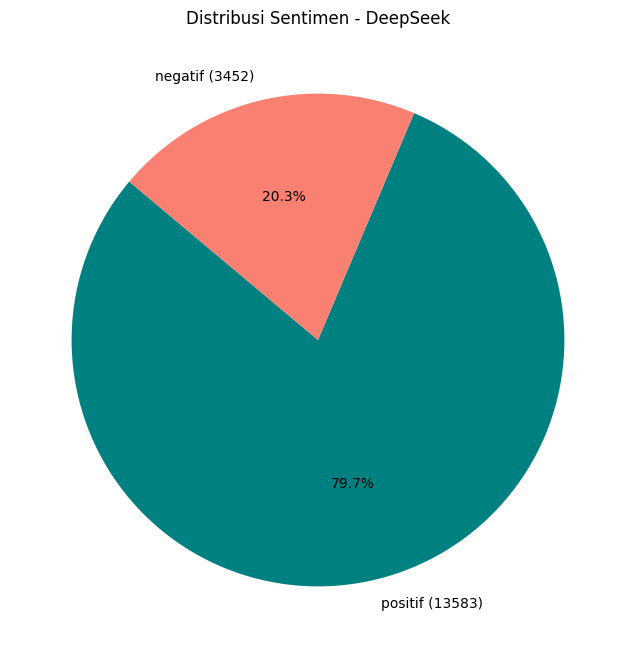

In [44]:
import matplotlib.pyplot as plt

# Hitung jumlah data berdasarkan sentimen
sentiment_counts = df['sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts,
    labels=[f"{label} ({count})" for label, count in sentiment_counts.items()],
    autopct='%1.1f%%',
    startangle=140,
    colors=['teal', 'salmon', 'grey']
)
plt.title('Distribusi Sentimen - DeepSeek')
plt.show()


## *Bar Chart Frequency Words*

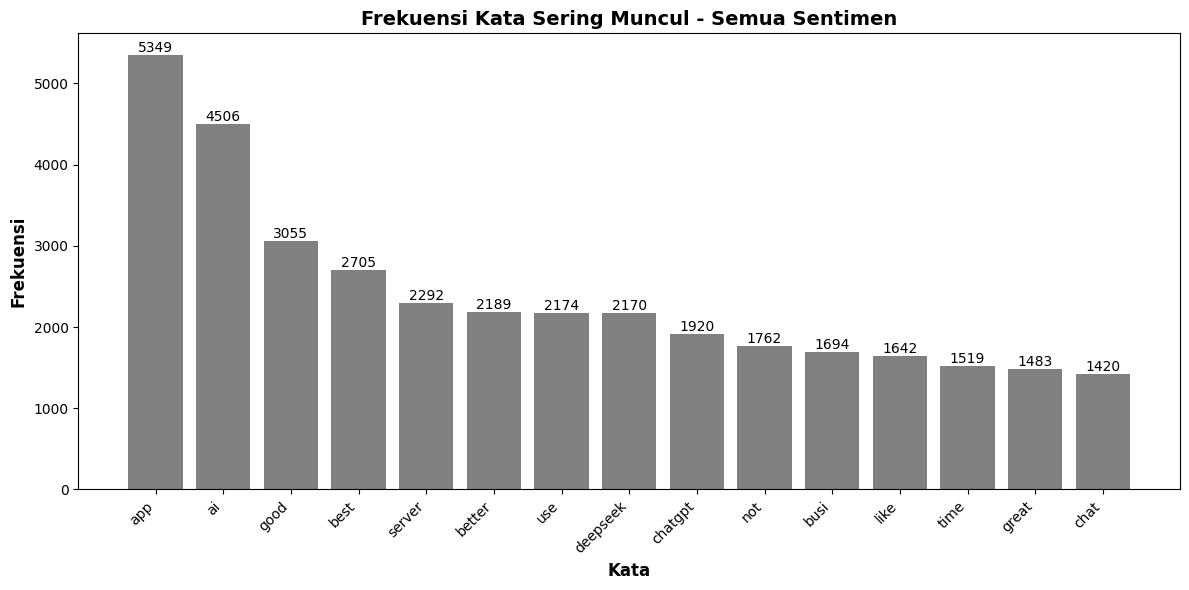

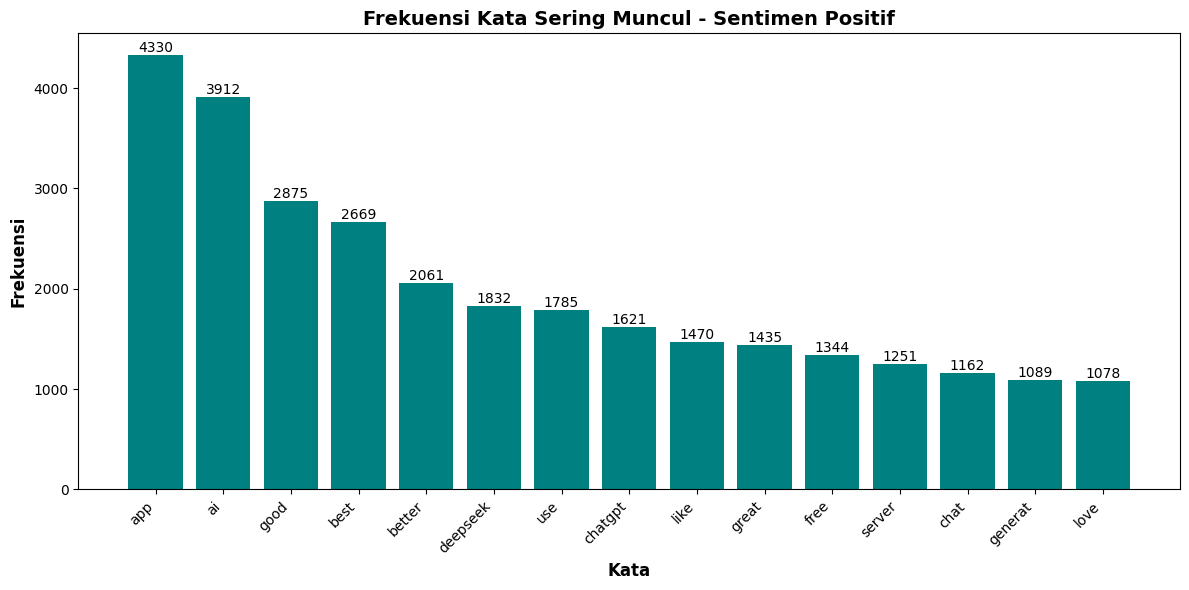

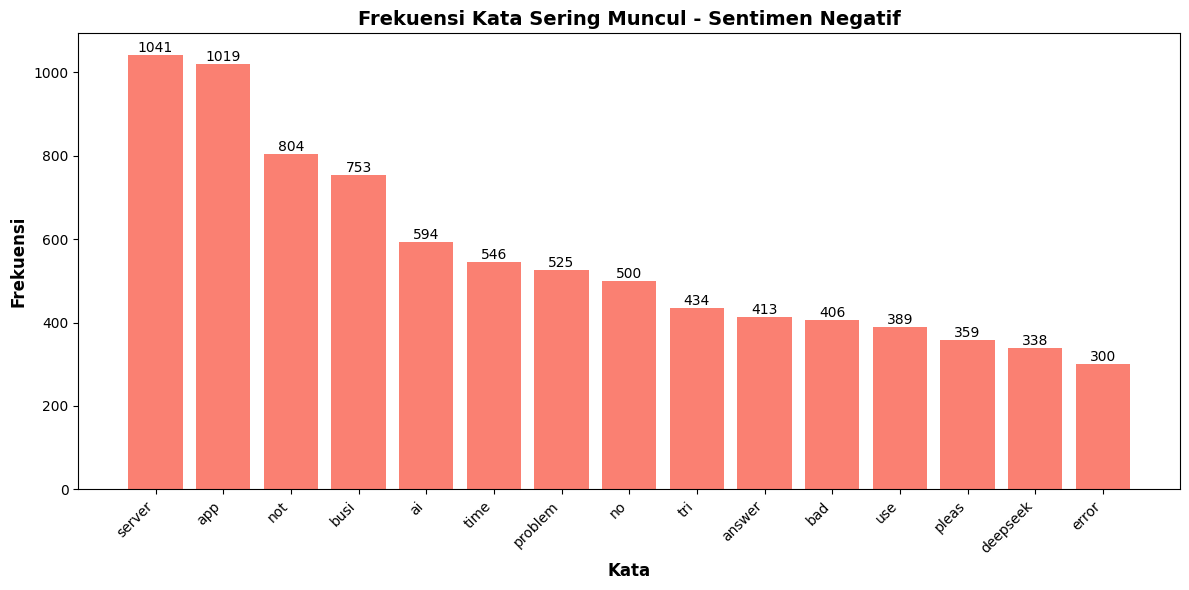

In [45]:

def plot_top_words(text_list, title, color):
    # Gabungkan semua teks
    all_text = " ".join(text_list)

    # Tokenisasi sederhana (asumsinya sudah di-preprocess)
    tokens = all_text.split()

    # Hitung frekuensi kata
    word_counts = Counter(tokens)

    # Ambil 15 kata paling sering muncul
    top_words = word_counts.most_common(15)

    # Siapkan data untuk plotting
    words = [word for word, count in top_words]
    counts = [count for word, count in top_words]

    # Plot batang
    plt.figure(figsize=(12, 6))
    bars = plt.bar(words, counts, color=color)

    # Label
    plt.xlabel("Kata", fontsize=12, fontweight="bold")
    plt.ylabel("Frekuensi", fontsize=12, fontweight="bold")
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xticks(rotation=45, ha='right')

    # Tampilkan angka di atas batang
    for bar, count in zip(bars, counts):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, count, va='bottom', ha='center')

    plt.tight_layout()
    plt.show()

# Filter data
df_positif = df[df['sentiment'] == 'positif']
df_negatif = df[df['sentiment'] == 'negatif']

# ✅ Plot untuk seluruh data (semua sentimen)
plot_top_words(df['final_clean_text'].tolist(), 'Frekuensi Kata Sering Muncul - Semua Sentimen', 'grey')

# ✅ Plot untuk sentimen positif
plot_top_words(df_positif['final_clean_text'].tolist(), 'Frekuensi Kata Sering Muncul - Sentimen Positif', 'teal')

# ✅ Plot untuk sentimen negatif
plot_top_words(df_negatif['final_clean_text'].tolist(), 'Frekuensi Kata Sering Muncul - Sentimen Negatif', 'salmon')

## *Word Clouds*

In [46]:
# Define a function to generate a word cloud for any given text and polarity
def generate_wordcloud(text, title, colormap):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [47]:
# Ensure all entries in 'final_clean_text' are strings
df['final_clean_text'] = df['final_clean_text'].astype(str)

# Combine texts for each sentiment
general_text = ' '.join(df['final_clean_text'])
positive_text = ' '.join(df[df['sentiment'] == 'positif']['final_clean_text'])
negative_text = ' '.join(df[df['sentiment'] == 'negatif']['final_clean_text'])

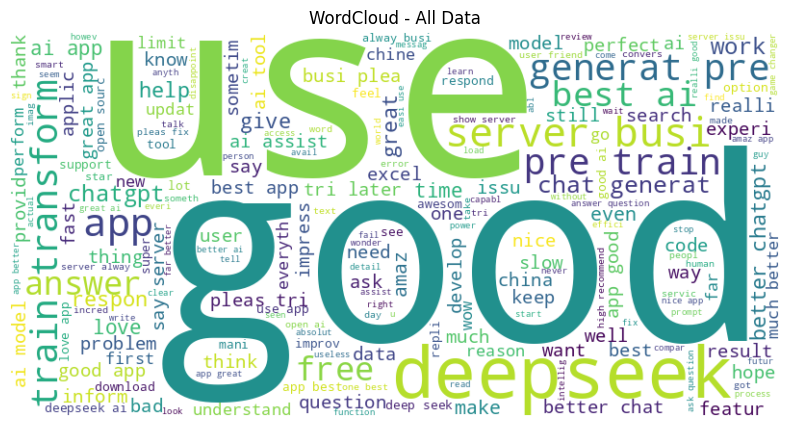

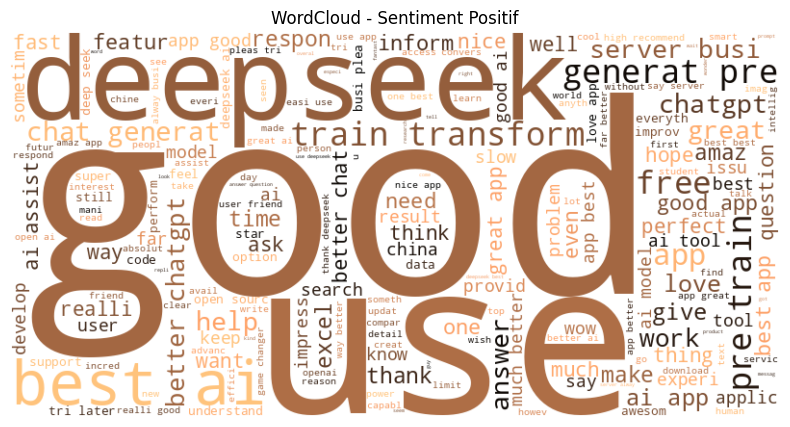

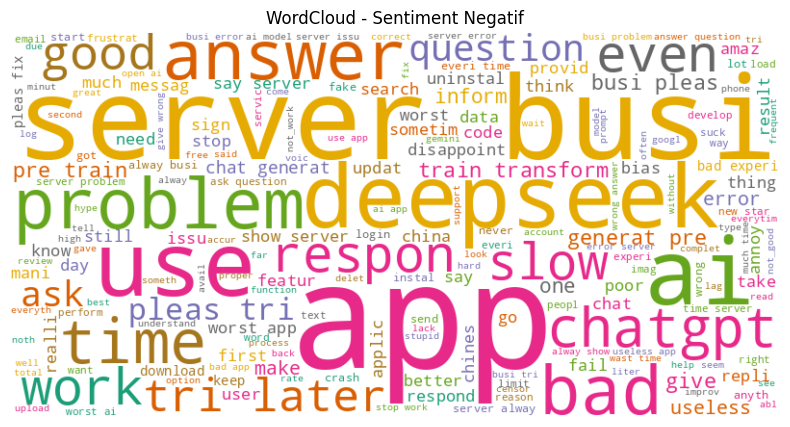

In [48]:
# Generate word clouds for each sentiment category
generate_wordcloud(general_text, "WordCloud - All Data", "viridis")
generate_wordcloud(positive_text, "WordCloud - Sentiment Positif", "copper")
generate_wordcloud(negative_text, "WordCloud - Sentiment Negatif", "Dark2")

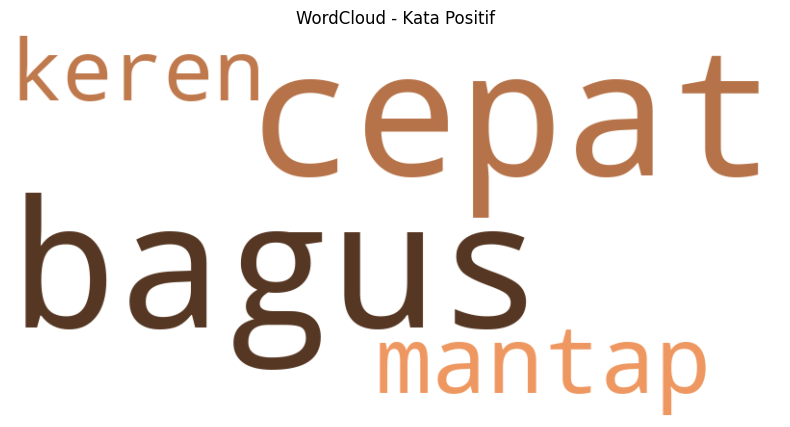

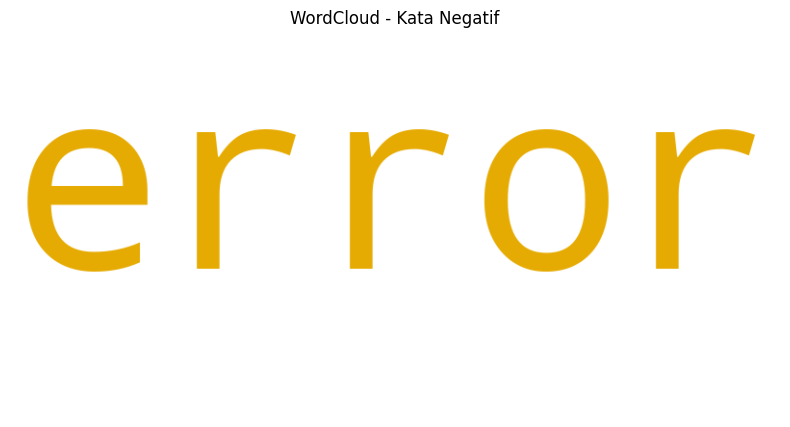

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Contoh: load lexicon positif & negatif (bisa dari file)
lexicon_positif = {"bagus", "mantap", "cepat", "baik", "gratis", "membantu", "keren", "luar biasa", "suka"}
lexicon_negatif = {"sibuk", "lambat", "error", "turun", "buruk", "lemot"}

# Fungsi untuk hapus kata berdasarkan lexicon
def filter_kata(teks, daftar_kata):
    return " ".join([kata for kata in teks.split() if kata.lower() in daftar_kata])

# Pastikan semua text adalah string
df['final_clean_text'] = df['final_clean_text'].astype(str)

# Filter teks berdasarkan lexicon
positive_text = " ".join(filter_kata(teks, lexicon_positif)
                         for teks in df[df['sentiment'] == 'positif']['final_clean_text'])
negative_text = " ".join(filter_kata(teks, lexicon_negatif)
                         for teks in df[df['sentiment'] == 'negatif']['final_clean_text'])

# Fungsi untuk generate word cloud
def generate_wordcloud(text, title, colormap):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Buat word cloud murni kata positif & negatif
generate_wordcloud(positive_text, "WordCloud - Kata Positif", "copper")
generate_wordcloud(negative_text, "WordCloud - Kata Negatif", "Dark2")


# **⚙️EKSTRASI TF-IDF**

## 📚🔍TF-IDF VECTORIZER

In [50]:
# Define the features and labels
X = df['final_clean_text']
y = df['sentiment']

In [51]:
# 2. TF-IDF tanpa .toarray() supaya tetap sparse dan efisien
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(X)

# 3. Ambil nama-nama fitur dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# 4. Buat list kosong untuk menampung hasil
tfidf_feature_list = []
tfidf_value_list = []
text_list = []
sentiment_list = []

# 5. Loop untuk tiap dokumen
for i in range(X_tfidf.shape[0]):
    row = X_tfidf[i]
    nz_indices = row.nonzero()[1]  # kolom yang nilainya ≠ 0
    features = [feature_names[j] for j in nz_indices]
    values = row.data  # nilai tf-idf non-zero
    # Format nilai tf-idf hingga 4 digit desimal
    rounded_values = [round(float(val), 4) for val in values]

    tfidf_feature_list.append(features)
    # tfidf_value_list.append(values.tolist())
    tfidf_value_list.append(rounded_values)
    text_list.append(X.iloc[i])
    sentiment_list.append(y.iloc[i])

# 6. Buat DataFrame akhir
df_output = pd.DataFrame({
    'final_clean_text': text_list,
    'tfidf_features': tfidf_feature_list,
    'tfidf_values': tfidf_value_list,
    'sentiment': sentiment_list
})

# 7. Simpan ke CSV
df_output.to_csv('hasil_tfidf.csv', index=False)


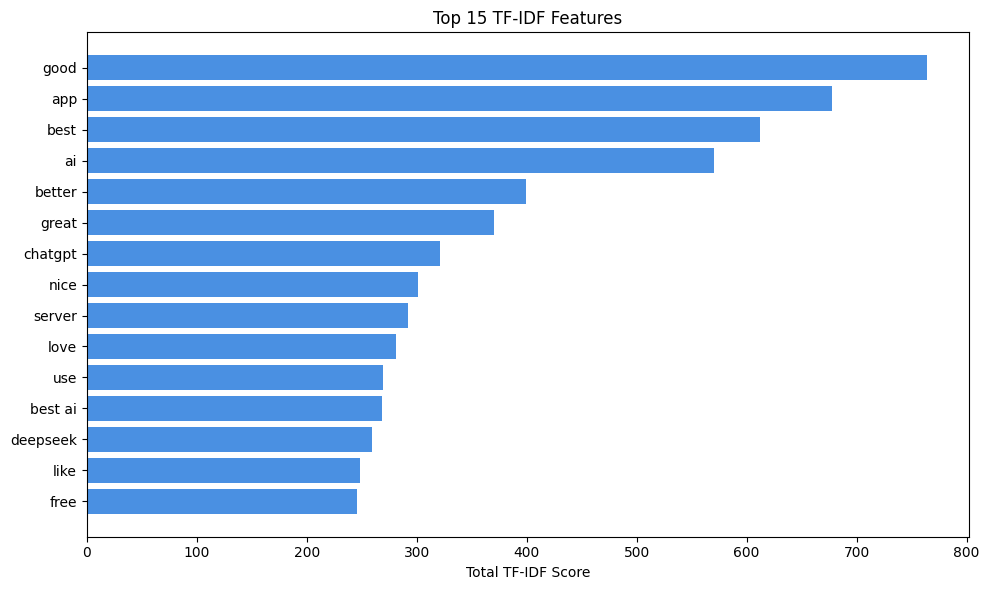

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Hitung total TF-IDF per fitur (dijumlahkan antar dokumen)
tfidf_sums = np.array(X_tfidf.sum(axis=0)).flatten()

# 2. Ambil indeks 15 fitur dengan bobot tertinggi
top_indices = tfidf_sums.argsort()[::-1][:15]

# 3. Ambil nama dan bobot dari fitur-fitur tersebut
top_features = [feature_names[i] for i in top_indices]
top_scores = tfidf_sums[top_indices]

# 4. Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_scores[::-1], color='#4A90E2')
plt.xlabel('Total TF-IDF Score')
plt.title('Top 15 TF-IDF Features')
plt.tight_layout()
plt.show()


# ✂️📊🔀PEMBAGIAN DATA TRAINING DAN DATA TEST

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

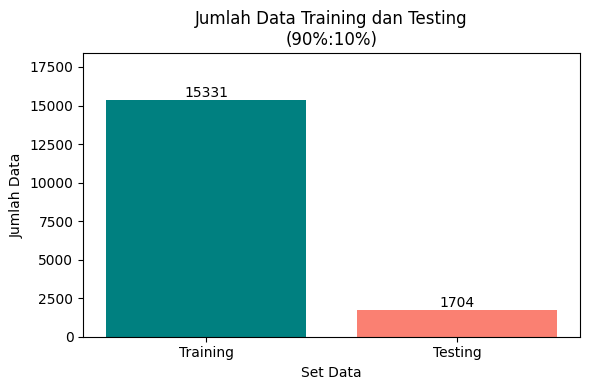

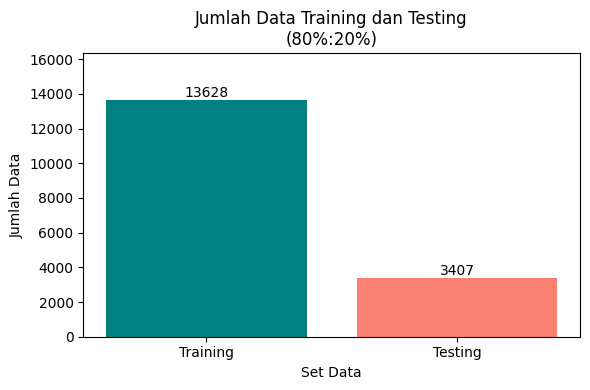

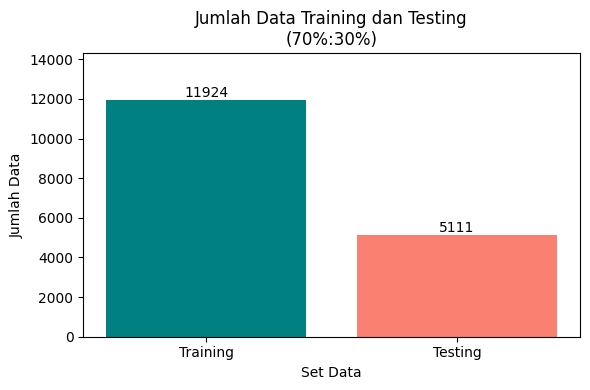

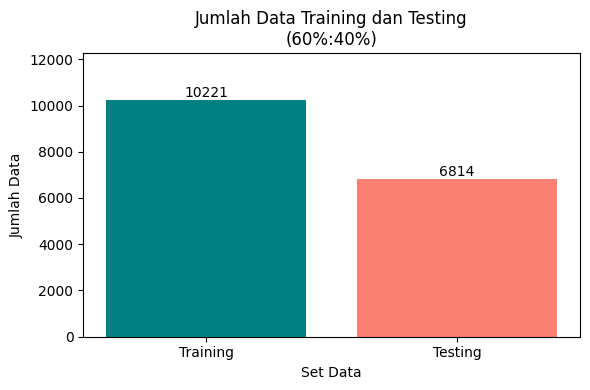

In [54]:

# Daftar rasio test_size
test_sizes = [0.1, 0.2, 0.3, 0.4]

split_data = {}  # Dictionary untuk menyimpan hasil split

for test_size in test_sizes:
    # Split data hanya sekali
    X_train, X_test, y_train, y_test = train_test_split(
        X_tfidf,
        y,
        test_size=test_size,
        random_state=42,
        stratify=y
    )

    # Simpan ke dictionary
    split_data[test_size] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

    df_counts = pd.DataFrame({
    'Set Data': ['Training', 'Testing'],
    'Jumlah Data': [X_train.shape[0], X_test.shape[0]]
    })


    plt.figure(figsize=(6, 4))
    bars = plt.bar(df_counts['Set Data'], df_counts['Jumlah Data'], color=['teal', 'salmon'])
    plt.title(f'Jumlah Data Training dan Testing\n({1 - test_size:.0%}:{test_size:.0%})')
    plt.xlabel('Set Data')
    plt.ylabel('Jumlah Data')
    plt.ylim(0, max(df_counts['Jumlah Data']) * 1.2)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval),
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()


In [55]:
#Cek Distribusi Label Sebelum Training
print(y.value_counts(normalize=True))

sentiment
positif    0.797358
negatif    0.202642
Name: proportion, dtype: float64


# **🧠🤖⚙️PEMODELAN & EVALUASI SVM CLASSIFIER**

## Model SVM dengan mencari parameter *C*  terbaik

In [56]:
# Simpan hasil akurasi
results = {'SVM': []}


=== Rasio Training:Testing = 90%:10% ===

SVM Akurasi: 0.9507
SVM Classification Report:
              precision    recall  f1-score   support

     negatif       0.85      0.92      0.88       345
     positif       0.98      0.96      0.97      1359

    accuracy                           0.95      1704
   macro avg       0.91      0.94      0.93      1704
weighted avg       0.95      0.95      0.95      1704



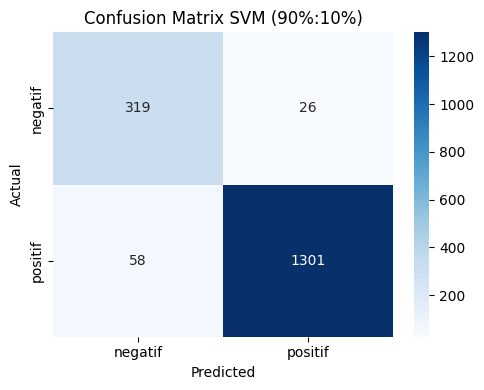


=== Rasio Training:Testing = 80%:20% ===

SVM Akurasi: 0.9448
SVM Classification Report:
              precision    recall  f1-score   support

     negatif       0.83      0.91      0.87       690
     positif       0.98      0.95      0.96      2717

    accuracy                           0.94      3407
   macro avg       0.90      0.93      0.92      3407
weighted avg       0.95      0.94      0.95      3407



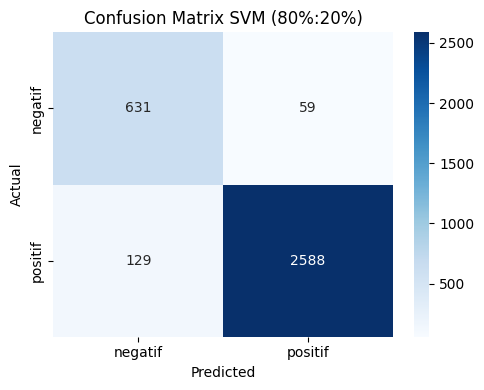


=== Rasio Training:Testing = 70%:30% ===

SVM Akurasi: 0.9415
SVM Classification Report:
              precision    recall  f1-score   support

     negatif       0.82      0.91      0.86      1036
     positif       0.98      0.95      0.96      4075

    accuracy                           0.94      5111
   macro avg       0.90      0.93      0.91      5111
weighted avg       0.94      0.94      0.94      5111



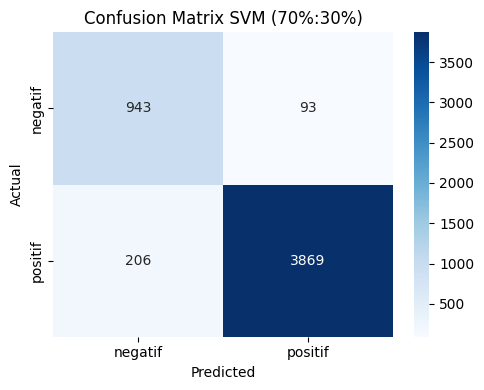


=== Rasio Training:Testing = 60%:40% ===

SVM Akurasi: 0.9401
SVM Classification Report:
              precision    recall  f1-score   support

     negatif       0.82      0.90      0.86      1381
     positif       0.97      0.95      0.96      5433

    accuracy                           0.94      6814
   macro avg       0.90      0.93      0.91      6814
weighted avg       0.94      0.94      0.94      6814



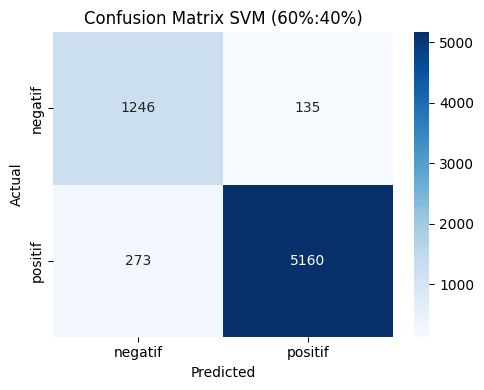

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score
for test_size in test_sizes:
    print(f"\n=== Rasio Training:Testing = {1 - test_size:.0%}:{test_size:.0%} ===")

    # Ambil hasil split dari dictionary
    split = split_data[test_size]
    X_train = split['X_train']
    X_test = split['X_test']
    y_train = split['y_train']
    y_test = split['y_test']

    # Training SVM
    svm = SVC(kernel='linear', class_weight='balanced')
    param_grid = {'C': [0.01, 0.1, 1]}

    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_svm = grid_search.best_estimator_
    y_pred = best_svm.predict(X_test)

    # Evaluasi metrik
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='positif')
    rec = recall_score(y_test, y_pred, pos_label='positif')
    f1 = f1_score(y_test, y_pred, pos_label='positif')

    print(f"\nSVM Akurasi: {acc:.4f}")
    print("SVM Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=best_svm.classes_, yticklabels=best_svm.classes_)
    plt.title(f'Confusion Matrix SVM ({1 - test_size:.0%}:{test_size:.0%})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Simpan hasil evaluasi
    results['SVM'].append({
        'Rasio': f"{1 - test_size:.0%}:{test_size:.0%}",
        'Akurasi': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Best_C': grid_search.best_params_['C']
    })


In [58]:
# Ringkasan hasil SVM
df_svm = pd.DataFrame(results['SVM'])
print("\nRingkasan Akurasi SVM dengan Berbagai Rasio:")
print(df_svm)



Ringkasan Akurasi SVM dengan Berbagai Rasio:
     Rasio   Akurasi  Precision    Recall  F1-Score  Best_C
0  90%:10%  0.950704   0.980407  0.957322  0.968727       1
1  80%:20%  0.944819   0.977711  0.952521  0.964952       1
2  70%:30%  0.941499   0.976527  0.949448  0.962797       1
3  60%:40%  0.940123   0.974504  0.949752  0.961969       1


In [59]:
# from sklearn.model_selection import learning_curve
# import numpy as np

# # Ambil salah satu split data (misalnya dari test_size = 0.2)
# split = split_data[0.2]
# X_train = split['X_train']
# y_train = split['y_train']

# # Gunakan model terbaik dari sebelumnya
# svm = SVC(kernel='linear', C=1, class_weight='balanced')

# # Hitung learning curve
# train_sizes, train_scores, val_scores = learning_curve(
#     svm, X_train, y_train,
#     train_sizes=np.linspace(0.1, 1.0, 10),
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1
# )

# # Hitung rata-rata dan standar deviasi
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# val_scores_mean = np.mean(val_scores, axis=1)
# val_scores_std = np.std(val_scores, axis=1)

# # Plot learning curve
# plt.figure(figsize=(8, 5))
# plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2, color='blue')

# plt.plot(train_sizes, val_scores_mean, 'o-', color='orange', label='Validation score')
# plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
#                  val_scores_mean + val_scores_std, alpha=0.2, color='orange')

# plt.title('Learning Curve - SVM (Linear Kernel)')
# plt.xlabel('Jumlah Data Training')
# plt.ylabel('Akurasi')
# plt.grid(True)
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()


In [60]:
# # Konversi rasio ke bentuk numerik (untuk keperluan sumbu x di plot)
# df_results['Test Size'] = df_results['Rasio'].apply(lambda r: float(r.split(':')[1].replace('%','')) / 100)

# # Buat line chart
# plt.figure(figsize=(8, 5))
# sns.lineplot(data=df_results, x='Test Size', y='Akurasi', marker='o', color='teal', linewidth=2)
# plt.title('Perbandingan Akurasi SVM pada Berbagai Rasio Data Testing', fontsize=13)
# plt.xlabel('Rasio Data Testing')
# plt.ylabel('Akurasi')
# plt.xticks(df_results['Test Size'])  # supaya titik x hanya pada rasio yang diuji
# plt.grid(True)
# plt.show()


## Pemodelan K-NN dan Naive Bayes sebagai perbandingan


=== Rasio Training:Testing = 90%:10% ===

KNN Accuracy: 0.9049
KNN Classification Report:
               precision    recall  f1-score   support

     negatif       0.75      0.79      0.77       345
     positif       0.95      0.93      0.94      1359

    accuracy                           0.90      1704
   macro avg       0.85      0.86      0.86      1704
weighted avg       0.91      0.90      0.91      1704



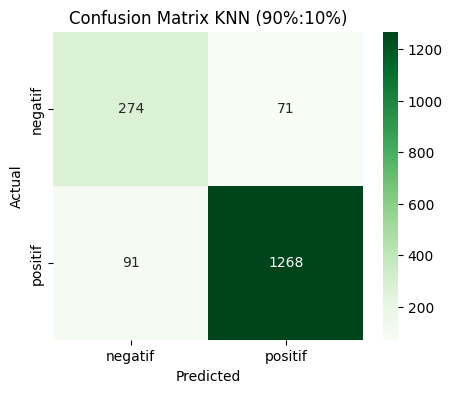


Naive Bayes Accuracy: 0.9108
Naive Bayes Classification Report:
               precision    recall  f1-score   support

     negatif       0.87      0.66      0.75       345
     positif       0.92      0.97      0.95      1359

    accuracy                           0.91      1704
   macro avg       0.89      0.82      0.85      1704
weighted avg       0.91      0.91      0.91      1704



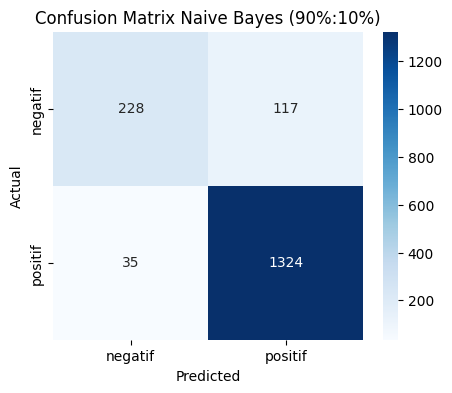


=== Rasio Training:Testing = 80%:20% ===

KNN Accuracy: 0.8967
KNN Classification Report:
               precision    recall  f1-score   support

     negatif       0.74      0.76      0.75       690
     positif       0.94      0.93      0.94      2717

    accuracy                           0.90      3407
   macro avg       0.84      0.84      0.84      3407
weighted avg       0.90      0.90      0.90      3407



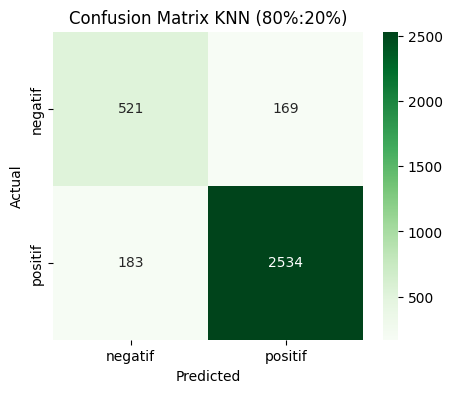


Naive Bayes Accuracy: 0.9052
Naive Bayes Classification Report:
               precision    recall  f1-score   support

     negatif       0.87      0.62      0.73       690
     positif       0.91      0.98      0.94      2717

    accuracy                           0.91      3407
   macro avg       0.89      0.80      0.83      3407
weighted avg       0.90      0.91      0.90      3407



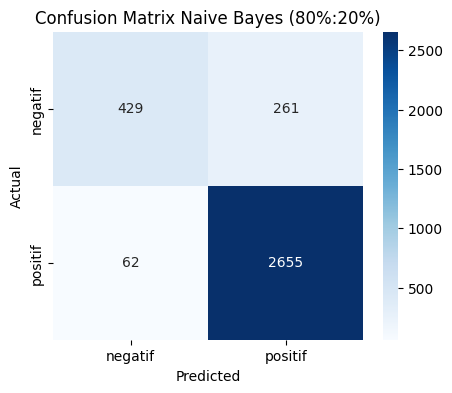


=== Rasio Training:Testing = 70%:30% ===

KNN Accuracy: 0.8961
KNN Classification Report:
               precision    recall  f1-score   support

     negatif       0.74      0.74      0.74      1036
     positif       0.93      0.93      0.93      4075

    accuracy                           0.90      5111
   macro avg       0.84      0.84      0.84      5111
weighted avg       0.90      0.90      0.90      5111



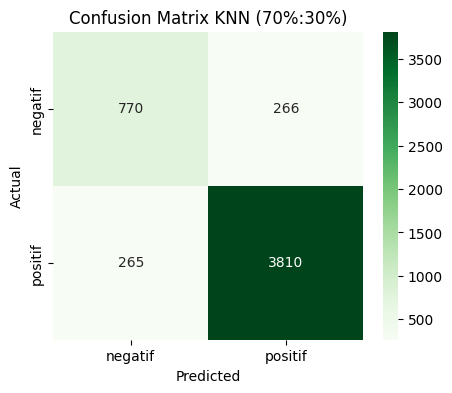


Naive Bayes Accuracy: 0.8990
Naive Bayes Classification Report:
               precision    recall  f1-score   support

     negatif       0.88      0.58      0.70      1036
     positif       0.90      0.98      0.94      4075

    accuracy                           0.90      5111
   macro avg       0.89      0.78      0.82      5111
weighted avg       0.90      0.90      0.89      5111



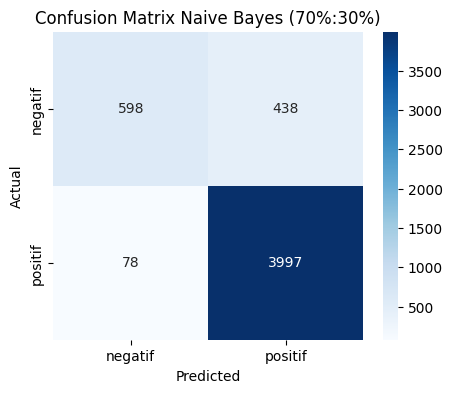


=== Rasio Training:Testing = 60%:40% ===

KNN Accuracy: 0.8927
KNN Classification Report:
               precision    recall  f1-score   support

     negatif       0.73      0.74      0.74      1381
     positif       0.93      0.93      0.93      5433

    accuracy                           0.89      6814
   macro avg       0.83      0.83      0.83      6814
weighted avg       0.89      0.89      0.89      6814



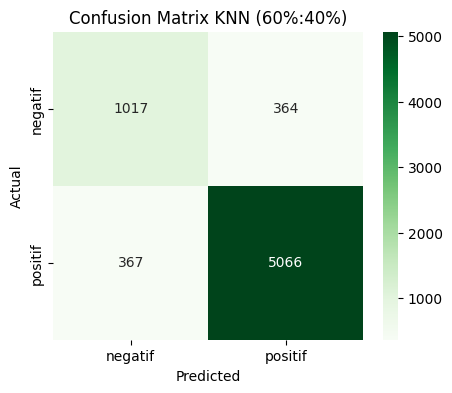


Naive Bayes Accuracy: 0.8902
Naive Bayes Classification Report:
               precision    recall  f1-score   support

     negatif       0.88      0.53      0.66      1381
     positif       0.89      0.98      0.93      5433

    accuracy                           0.89      6814
   macro avg       0.89      0.76      0.80      6814
weighted avg       0.89      0.89      0.88      6814



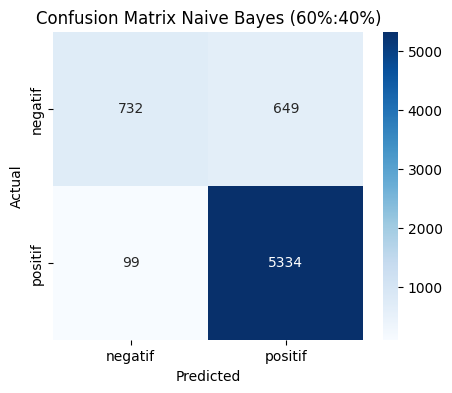

In [61]:
# Simpan hasil akurasi
results = {'KNN': [], 'Naive Bayes': []}
# === KNN & Naive Bayes dengan Precision, Recall, F1 ===
for test_size in test_sizes:
    print(f"\n=== Rasio Training:Testing = {1-test_size:.0%}:{test_size:.0%} ===")
    # Ambil hasil split dari dictionary
    split = split_data[test_size]
    X_train = split['X_train']
    X_test = split['X_test']
    y_train = split['y_train']
    y_test = split['y_test']

    # === KNN ===
    knn = KNeighborsClassifier(n_neighbors=11)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    acc_knn = accuracy_score(y_test, y_pred_knn)
    prec_knn = precision_score(y_test, y_pred_knn, pos_label='positif')
    rec_knn = recall_score(y_test, y_pred_knn, pos_label='positif')
    f1_knn = f1_score(y_test, y_pred_knn, pos_label='positif')

    print(f"\nKNN Accuracy: {acc_knn:.4f}")
    print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

    cm_knn = confusion_matrix(y_test, y_pred_knn)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
                xticklabels=knn.classes_, yticklabels=knn.classes_)
    plt.title(f'Confusion Matrix KNN ({1-test_size:.0%}:{test_size:.0%})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    results['KNN'].append({
        'Rasio': f"{1-test_size:.0%}:{test_size:.0%}",
        'Akurasi': acc_knn,
        'Precision': prec_knn,
        'Recall': rec_knn,
        'F1-Score': f1_knn
    })

    # === Naive Bayes ===
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    y_pred_nb = nb.predict(X_test)

    acc_nb = accuracy_score(y_test, y_pred_nb)
    prec_nb = precision_score(y_test, y_pred_nb, pos_label='positif')
    rec_nb = recall_score(y_test, y_pred_nb, pos_label='positif')
    f1_nb = f1_score(y_test, y_pred_nb, pos_label='positif')

    print(f"\nNaive Bayes Accuracy: {acc_nb:.4f}")
    print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

    cm_nb = confusion_matrix(y_test, y_pred_nb)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
                xticklabels=nb.classes_, yticklabels=nb.classes_)
    plt.title(f'Confusion Matrix Naive Bayes ({1-test_size:.0%}:{test_size:.0%})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    results['Naive Bayes'].append({
        'Rasio': f"{1-test_size:.0%}:{test_size:.0%}",
        'Akurasi': acc_nb,
        'Precision': prec_nb,
        'Recall': rec_nb,
        'F1-Score': f1_nb
    })



In [62]:
# Ringkasan hasil KNN
df_knn = pd.DataFrame(results['KNN'])
print("\nRingkasan Akurasi KNN dengan Berbagai Rasio:")
print(df_knn)


Ringkasan Akurasi KNN dengan Berbagai Rasio:
     Rasio   Akurasi  Precision    Recall  F1-Score
0  90%:10%  0.904930   0.946975  0.933039  0.939956
1  80%:20%  0.896683   0.937477  0.932646  0.935055
2  70%:30%  0.896106   0.934740  0.934969  0.934855
3  60%:40%  0.892721   0.932965  0.932450  0.932707


In [63]:
# Ringkasan hasil Naive Bayes
df_nb = pd.DataFrame(results['Naive Bayes'])
print("\nRingkasan Akurasi Naive Bayes dengan Berbagai Rasio:")
print(df_nb)


Ringkasan Akurasi Naive Bayes dengan Berbagai Rasio:
     Rasio   Akurasi  Precision    Recall  F1-Score
0  90%:10%  0.910798   0.918806  0.974246  0.945714
1  80%:20%  0.905195   0.910494  0.977181  0.942659
2  70%:30%  0.899041   0.901240  0.980859  0.939365
3  60%:40%  0.890226   0.891526  0.981778  0.934478


In [64]:
# Buat DataFrame masing-masing dan sort sesuai Rasio agar sejajar
df_svm = pd.DataFrame(results['SVM']).sort_values('Rasio')
df_knn = pd.DataFrame(results['KNN']).sort_values('Rasio')
df_nb = pd.DataFrame(results['Naive Bayes']).sort_values('Rasio')

# Line Chart Perbandingan
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
plt.plot(df_svm['Rasio'], df_svm['Akurasi'], marker='^', label='SVM', color='orange')
plt.plot(df_knn['Rasio'], df_knn['Akurasi'], marker='o', label='KNN', color='green')
plt.plot(df_nb['Rasio'], df_nb['Akurasi'], marker='s', label='Naive Bayes', color='blue')

plt.title('Perbandingan Akurasi Model')
plt.xlabel('Rasio Training:Testing')
plt.ylabel('Akurasi')
plt.ylim(0.6, 1.0)
plt.grid(True)
plt.legend()
plt.show()



KeyError: 'SVM'

In [ ]:
# prompt: buatkan codingan untuk menguji dengan data baru yaitu teksnya begini "the apps it's not good well"

# Preprocess the new text
new_text = "DeepSeek best ai"

# Apply the preprocessing steps
cleaned_new_text = clean_text(new_text)
lowercased_new_text = lowercase_text(cleaned_new_text)
slang_replaced_new_text = replace_slang_words(lowercased_new_text)
tokenized_new_text = tokenize_text(slang_replaced_new_text)
no_stopwords_new_text = remove_stopwords(tokenized_new_text)
stemmed_new_text = stem_text(no_stopwords_new_text)
final_cleaned_new_text = join_tokens(stemmed_new_text)

# Vectorize the preprocessed new text using the trained TF-IDF vectorizer
X_new = tfidf_vectorizer.transform([final_cleaned_new_text])

# Predict the sentiment using the best trained SVM model
new_sentiment_prediction = best_svm.predict(X_new)

print(f"Original Text: '{new_text}'")
print(f"Preprocessed Text: '{final_cleaned_new_text}'")
print(f"Predicted Sentiment: {new_sentiment_prediction[0]}")

In [ ]:
# df.to_csv("hasil_akhir_analisis_sentimen.csv", index=False, encoding="utf-8")